<h2 align="left"><font color=#ff6200>P8 Customer Segmentation Models By Upendra Chaturvedi</font></h2>

Auther@upenc

Data Analyst Intern at EY GDS-AICTE

Loadinng all modules that would be utilized in this notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [2]:
df = pd.read_csv("Online_retail.csv", encoding="ISO-8859-1")
df.shape

(541909, 8)

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# Data Overview

**From the above information this is out Dataset Description:**
| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Code uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<h3 align="left">Inferences:</h3>

InvoiceNo, StockCode, Description: These columns represent information about the products sold.

Quantity, UnitPrice: These columns represent the quantity and unit price of each product sold, respectively.

InvoiceDate: This column represents the date and time when each invoice was generated. However, it's currently stored as an object data type. but fo better understanding we will Convert it to a datetime data type.

CustomerID: This column contains unique identifiers for customers.

Country: This column represents the country where each transaction occurred. It contains categorical data indicating the location of the transaction.

**Missing Values:**

Description: 1,454 missing values.
CustomerID: 135,080 missing values.

# descriptive statistics analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [6]:
df.describe(include=object).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [7]:
print(df[df['Quantity'] < 0])
(df['Quantity'] < 0).sum()

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0

10624

<h3 align="left">Inferences:</h3>

Based on descriptive statistics analysis:
* The negative quantities likely represent canceled orders or returns.
* The "C" prefix in the InvoiceNo column is a common convention used to indicate canceled transactions in retail datasets
* The majority of transactions have a quantity between 1 and 10, as indicated by the 25th to 75th percentiles.
* There are a total of 541,909 unique invoices recorded in the dataset.
* The most frequent invoice number is "573585", which appears 1,114 times.
* There are a total of 4,070 unique stock codes recorded in the dataset.
* The most frequent stock code is "85123A", which appears 2,313 times.
* There are a total of 540,455 unique descriptions recorded in the dataset.
* The most frequent description is "WHITE HANGING HEART T-LIGHT HOLDER", which appears 2,369 times.
* There are a total of 38 unique countries recorded in the dataset.
* The most frequent country is "United Kingdom", which appears 495,478 times.

# Data Cleaning & Data Transformation 

In [8]:

missing_percentage = (df.isnull().sum()[df.isnull().sum() > 0] / df.shape[0]) * 100
print(missing_percentage)
non_missing_percentage = 100 - missing_percentage

Description     0.268311
CustomerID     24.926694
dtype: float64


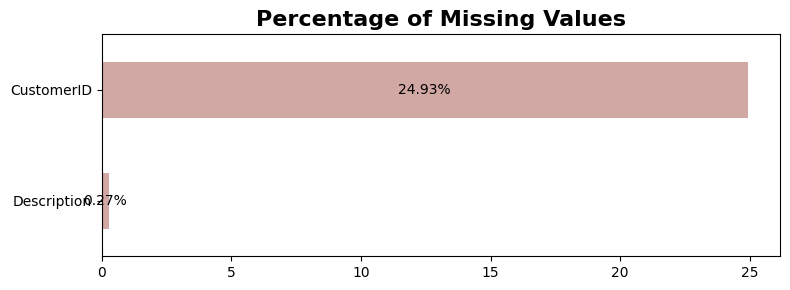

In [32]:
plt.figure(figsize=(8, 3))
bars = missing_percentage.plot(kind='barh', color='#d1a8a3')
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=16)
plt.xticks(rotation=0)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}%', 
             ha='center', 
             va='center')  

plt.tight_layout()  
plt.show() 

* Since the CustomerID column is crucial for identifying unique customers and maintaining data integrity, removing rows with missing CustomerID values will be a suitable approach.
* The presence of missing values in the Description column may affect detailed product analysis.
* Removing rows with missing Description values allows for a focus on broader sales trends or product performance analysis rather than detailed product descriptions.


In [10]:
rows_with_missing_values = df[df['CustomerID'].isnull() | df['Description'].isnull()]
df.dropna(subset=['CustomerID', 'Description'],inplace=True)
df.shape

(406829, 8)

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Handling Duplicates

In [12]:
df.duplicated(keep=False).sum()

10062

In [13]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom


In [14]:
df.drop_duplicates(inplace=True)
df.shape

(401604, 8)

# Treating Cancelled Transactions

To identify transactions that were cancelled, we will filter the DataFrame based on the `InvoiceNo` column where the value starts with "C".

In [15]:
cancelled_transactions = df[df['InvoiceNo'].str.startswith('C')]

cancelled_transactions.shape

(8872, 8)

In [16]:
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
print(df[['InvoiceNo', 'Transaction_Status']])


       InvoiceNo Transaction_Status
0         536365          Completed
1         536365          Completed
2         536365          Completed
3         536365          Completed
4         536365          Completed
...          ...                ...
541904    581587          Completed
541905    581587          Completed
541906    581587          Completed
541907    581587          Completed
541908    581587          Completed

[401604 rows x 2 columns]


In [17]:
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID',axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [18]:
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


<h3 align="left">Inferences:</h3>

* The DataFrame contains `8,872` rows representing cancelled transactions, as identified by the 'InvoiceNo' column starting with `C`.
* Analyzing the characteristics of cancelled transactions, such as the products involved, customer segments, or time trends, may help identify patterns and inform strategies to reduce cancellations, improve customer satisfaction, and optimize business operations.
* Now the DataFrame contains transactions categorized as 'Cancelled' or 'Completed', providing insights for further analysis on cancellation patterns and completed transaction characteristics.

# Correcting StockCode Anomalies

In [19]:
df['StockCode'].nunique()

3684

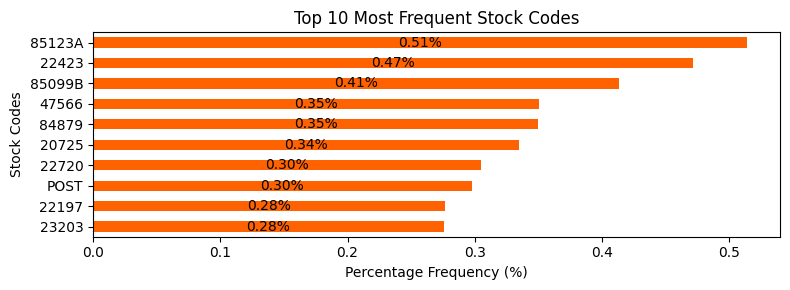

In [20]:
top_10_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100
plt.figure(figsize=(8, 3))
bars = top_10_codes.plot(kind='barh', color='#ff6200')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}%', 
             ha='center', 
             va='center')  

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.tight_layout()  
plt.gca().invert_yaxis()
plt.show() 

<h3 align="left">Inferences:</h3>

* Stock codes like '85123A', '22423', and '85099B' have relatively high frequencies, indicating that these items are frequently purchased or involved in transactions.
* The "POST" stock code likely represents transactions related to postage or shipping fees.
* Further investigation or data cleansing is necessary to ensure consistency and accuracy in the analysis, particularly regarding the absence of a numeric value associated with the "POST" stock code.

In [21]:
list_special_codes = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [22]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df[df['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


In [23]:
percentage_anomalous = (df['StockCode'].isin(list_special_codes).sum() / len(df)) * 100
print(f"{percentage_anomalous:.2f}%")


0.48%


<h3 align="left">Inferences:</h3>

* The existence of special codes are 'POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', and 'CRUK'.
* These special codes likely represent various types of transactions, such as postage fees ('POST'), discounts ('D'), manual entries ('M'), and banking charges ('BANK CHARGES'). Understanding these categories is crucial for accurate analysis and financial reporting.
* The result indicates that approximately 0.48% of the entries in the 'StockCode' column are classified as anomalous.


<h3 align="left">Strategy:</h3>

Excluding records with anomalous stock codes from the dataset aligns well with the project's objectives of clustering customers based on their product purchasing behaviors and developing a product recommendation system. 
Removing anomalous records ensures that the clustering algorithm and recommendation system are trained on relevant and representative data, leading to more reliable results and actionable insights.

In [24]:
#Removing rows with anamalous stock codes from the dtaset
df = df[~df['StockCode'].isin(list_special_codes)]

df.shape


(399689, 9)

# Cleaning Description Column

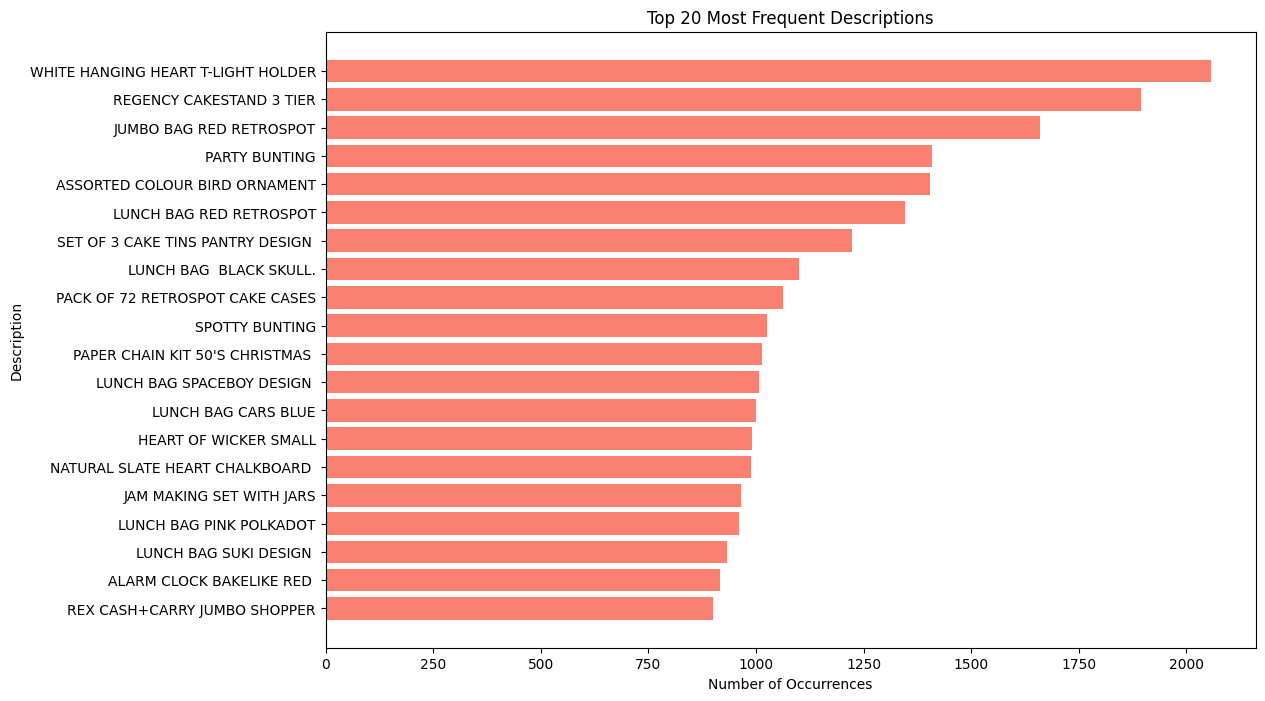

In [25]:
description_counts = df['Description'].value_counts()

top_20_descriptions = description_counts.head(20)
plt.figure(figsize=(12, 8))
plt.barh(top_20_descriptions.index[::-1], top_20_descriptions.values[::-1], color='Salmon')

plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 20 Most Frequent Descriptions')

plt.show()

<h3 align="left">Inferences:</h3>

* The dataset primarily comprises household items, especially those related to kitchenware, lunch bags, and decorative items, as indicated by the most frequent descriptions.
* As we can see, all descriptions are in uppercase, suggesting a standardized format for entering product descriptions in the database. However, given the inconsistencies observed in the dataset.
*  it's advisable to verify if there are descriptions entered in lowercase or a mixture of case styles to ensure data integrity.

In [26]:
lowercase_descriptions = df['Description'].unique()

lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

print("The unique descriptions containing lowercase characters are:")
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


<h3 align="left">Inferences:</h3>

- These descriptions include items such as discounts, bags with different weights, various types of pads with dimensions, a manual item, bank charges, and others.
- Upon reviewing the descriptions that contain lowercase characters, it appears that "Next Day Carriage" and "High Resolution Image" are the entries that don't seem to fit the pattern of typical product descriptions. 
- Identifying and filtering out such entries is crucial for maintaining the integrity of the dataset and ensuring that only relevant product descriptions are considered in the analysis.

In [27]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

print(f"{service_related_percentage:.2f}%")


0.02%


In [28]:
df = df[~df['Description'].isin(service_related_descriptions)]
df['Description'] = df['Description'].str.upper()
df.shape[0]

399606

# Treating Zero Unit Prices

In [29]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

<h3 align="left">Inferences:</h3>


* From these statistics, we can infer that the majority of unit prices are relatively low, with the median price being less than 2.00. However, there is a wide range of prices, with some items being priced significantly higher, such as the maximum price of £649.50. 
* The minimum unit price is 0.00, which is unexpected and could indicate data entry errors, promotional items, or missing data.

The presence of zero values in the unit price column requires further investigation

In [30]:
# To better understand the quantities associated with zero unit prices in Dataset
df[df['UnitPrice']==0].describe()

,Quantity,UnitPrice,CustomerID
count,33.000000,33.0,33.000000
mean,420.515152,0.0,14252.575758
std,2176.713608,0.0,1659.811925
min,1.000000,0.0,12415.000000
25%,2.000000,0.0,13081.000000
50%,11.000000,0.0,13985.000000
75%,36.000000,0.0,14911.000000
max,12540.000000,0.0,18059.000000


In [31]:
df = df[df['UnitPrice']>0]
df.shape

(399573, 9)